## SENTIMENT ANALYSIS OF NEWS HEADLINES
Below are the news keywords that were used to extract the news headlines to generate the sentiment dataset
* Gold
* Economic crises
* inflation
* geopolitical event
* interest rate



### News headline EDA & Data Pre-processing

In [2382]:
# importing all the required library
import pandas as pd
import numpy as np
import re
import nltk
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil import parser
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from nltk.book import text2
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

import warnings
warnings.filterwarnings('ignore')

In [2383]:
# import the news headlines data and convert to dataframe
# The collected data do not have column header
# Defining the column headers for the news
headers = ['headline', 'link', 'date']  # Define the column headers

usd_news = pd.read_csv('datafile/marketwatchdir/data_usd_index.csv', encoding='ISO-8859-1', names=headers, header=None)
geopolitical_event_news = pd.read_csv('datafile/marketwatchdir/data_geopolitical_event.csv', encoding='ISO-8859-1', names=headers, header=None)
inflation_news = pd.read_csv('datafile/marketwatchdir/data_inflation.csv', encoding='ISO-8859-1', names=headers, header=None)
interest_rates_news = pd.read_csv('datafile/marketwatchdir/data_interest_rate.csv', encoding='ISO-8859-1', names=headers, header=None)
gold_news = pd.read_csv('datafile/marketwatchdir/data_GOLD.csv', encoding='ISO-8859-1', names=headers, header=None)
economic_crisis_news = pd.read_csv('datafile/marketwatchdir/data.csv', encoding='ISO-8859-1', names=headers, header=None)

#### Overview of all the news headline data

In [2385]:
# first 5 records of news headlines on USD
usd_news.head()

,headline,link,date
0,Heres how bond ETFs fared as investors parsed...,https://www.marketwatch.com/story/heres-how-bo...,"Oct. 10, 2024 at 6:52 p.m. ET"
1,Emerging markets have surged. Why JPMorgan say...,https://www.marketwatch.com/story/emerging-mar...,"Sep. 30, 2024 at 9:41 a.m. ET"
2,Gold is giving you a once-in-a-generation buyi...,https://www.marketwatch.com/story/gold-is-givi...,"Sep. 21, 2024 at 12:16 p.m. ET"
3,High-yield bond ETF rallies after Fed rate cut...,https://www.marketwatch.com/story/high-yield-b...,"Sep. 19, 2024 at 6:31 p.m. ET"
4,The U.S. dollar is weakening ahead of Fed rate...,https://www.marketwatch.com/story/the-u-s-doll...,"Sep. 18, 2024 at 5:34 p.m. ET"


In [2386]:
# first 5 records of news headlines on geopolitical event
geopolitical_event_news.head()

,headline,link,date
0,Im convinced the U.S. will be drawn into Wor...,https://www.marketwatch.com/story/im-convinced...,"Oct. 16, 2024 at 5:07 a.m. ET"
1,Americas aging population is on a collision c...,https://www.marketwatch.com/story/americas-agi...,"Oct. 15, 2024 at 12:39 p.m. ET"
2,Nvidia Rally Has Legs. Why It Can Defy China F...,https://www.marketwatch.com/articles/nvidia-st...,"Oct. 15, 2024 at 6:57 a.m. ET"
3,Oils War Premium Is Back. Can Prices Top $100?,https://www.marketwatch.com/articles/oil-war-p...,"Oct. 11, 2024 at 12:01 a.m. ET"
4,Attacks on Iranian Oil Could Cause Pain at the...,https://www.marketwatch.com/articles/gas-price...,"Oct. 4, 2024 at 10:30 a.m. ET"


In [2387]:
# first 5 records of news headlines on inflation rate
inflation_news.head()

,headline,link,date
0,Bond Vigilantes Are Out in Force. How To Prote...,https://www.marketwatch.com/articles/bonds-yie...,"Oct. 15, 2024 at 2:00 a.m. ET"
1,Get ready for another mutual fund with a hedge...,https://www.marketwatch.com/story/get-ready-fo...,"Oct. 15, 2024 at 12:01 a.m. ET"
2,Australian Consumer-Spending Slump Keeps Door ...,https://www.marketwatch.com/story/australian-c...,"Oct. 14, 2024 at 7:45 p.m. ET"
3,Hint of very high consumer inflation expecta...,https://www.marketwatch.com/story/hint-of-very...,"Oct. 14, 2024 at 2:51 p.m. ET"
4,Its so unfair! Im miserable in my job. Im...,https://www.marketwatch.com/story/its-so-unfai...,"Oct. 14, 2024 at 8:27 a.m. ET"


In [2388]:
# first 5 records of news headlines on interest rate
interest_rates_news.head()

,headline,link,date
0,TotalEnergies: Third Quarter 2024: Main Indica...,https://www.marketwatch.com/story/totalenergie...,"Oct. 15, 2024 at 2:20 a.m. ET"
1,Bond Vigilantes Are Out in Force. How To Prote...,https://www.marketwatch.com/articles/bonds-yie...,"Oct. 15, 2024 at 2:00 a.m. ET"
2,Get ready for another mutual fund with a hedge...,https://www.marketwatch.com/story/get-ready-fo...,"Oct. 15, 2024 at 12:01 a.m. ET"
3,Australian Consumer-Spending Slump Keeps Door ...,https://www.marketwatch.com/story/australian-c...,"Oct. 14, 2024 at 7:45 p.m. ET"
4,AMDs AI punches are landing where it counts ...,https://www.marketwatch.com/story/amds-ai-punc...,"Oct. 14, 2024 at 6:19 p.m. ET"


In [2389]:
# first 5 records of news headlines on gold
gold_news.head()

,headline,link,date
0,Materials Post Limited Gains After Waller Comm...,https://www.marketwatch.com/story/materials-po...,"Oct. 14, 2024 at 4:59 p.m. ET"
1,Gold Is Losing Steam. These 4 Stocks Are Just ...,https://www.marketwatch.com/articles/cyclical-...,"Oct. 14, 2024 at 3:34 p.m. ET"
2,Bitcoins Jump Is Boosting MicroStrategy and O...,https://www.marketwatch.com/articles/bitcoin-p...,"Oct. 14, 2024 at 1:43 p.m. ET"
3,G Mining Ventures Reports Fatality at Guyana Site,https://www.marketwatch.com/story/g-mining-ven...,"Oct. 14, 2024 at 11:30 a.m. ET"
4,"The market rally is broadening, so heres one ...",https://www.marketwatch.com/story/the-market-r...,"Oct. 14, 2024 at 9:32 a.m. ET"


In [2390]:
# first 5 records of news headlines on economic crisis
economic_crisis_news.head()

,headline,link,date
0,ï»¿âIâm convinced the U.S. will be drawn i...,https://www.marketwatch.com/story/im-convinced...,"Oct. 16, 2024 at 5:07 a.m. ET"
1,Americaâs aging population is on a collision...,https://www.marketwatch.com/story/americas-agi...,"Oct. 15, 2024 at 12:39 p.m. ET"
2,Nvidia Rally Has Legs. Why It Can Defy China F...,https://www.marketwatch.com/articles/nvidia-st...,"Oct. 15, 2024 at 6:57 a.m. ET"
3,Oilâs âWar Premiumâ Is Back. Can Prices ...,https://www.marketwatch.com/articles/oil-war-p...,"Oct. 11, 2024 at 12:01 a.m. ET"
4,Attacks on Iranian Oil Could Cause Pain at the...,https://www.marketwatch.com/articles/gas-price...,"Oct. 4, 2024 at 10:30 a.m. ET"


#### Pre-processing USD news headlines data

In [2392]:
df_usd_news =usd_news.copy()

In [2393]:
df_usd_news.head()

,headline,link,date
0,Heres how bond ETFs fared as investors parsed...,https://www.marketwatch.com/story/heres-how-bo...,"Oct. 10, 2024 at 6:52 p.m. ET"
1,Emerging markets have surged. Why JPMorgan say...,https://www.marketwatch.com/story/emerging-mar...,"Sep. 30, 2024 at 9:41 a.m. ET"
2,Gold is giving you a once-in-a-generation buyi...,https://www.marketwatch.com/story/gold-is-givi...,"Sep. 21, 2024 at 12:16 p.m. ET"
3,High-yield bond ETF rallies after Fed rate cut...,https://www.marketwatch.com/story/high-yield-b...,"Sep. 19, 2024 at 6:31 p.m. ET"
4,The U.S. dollar is weakening ahead of Fed rate...,https://www.marketwatch.com/story/the-u-s-doll...,"Sep. 18, 2024 at 5:34 p.m. ET"


In [2394]:
df_usd_news.shape

(3276, 3)

In [2395]:
df_usd_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  3276 non-null   object
 1   link      3276 non-null   object
 2   date      3276 non-null   object
dtypes: object(3)
memory usage: 76.9+ KB


#### Observation:
* The date column data type is showing as object datatype.
* The date column has some extra details that are not uniform accross the dataset.
* The link column is not needed for the model.
* headlines have some non alphanumeric characters.

In [2397]:
# function to remove the unwanted additional detail in the date column
def formatDate(date_string):
    # Remove "a.m./p.m." and the timezone (ET)
    cleaned_date_string = date_string.replace('a.m.', 'AM').replace('p.m.', 'PM').split(' at ')[0]
    
    # Define the format for parsing the cleaned string
    date_format = "%b. %d, %Y"
    
    # Convert the cleaned string to a datetime object
    parsed_date = datetime.strptime(cleaned_date_string, date_format)
    
    # Extract only the date and change the datatype to datetime
    only_date = parsed_date.date()
    only_date = pd.to_datetime(only_date)
    return only_date

In [2398]:
#function to remove unwanted columns
def removeColumn(df):
    df = df.drop(columns='link')
    return df

In [2399]:
# function to remove unwanted characters from the headlines using regular expression
def cleanHeadline(text):
    # Check if the input is a string, if not return an empty string or handle it
    if isinstance(text, str):
        # Remove unwanted characters (non-ASCII characters)
        cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)
    else:
        # Return empty string or handle it if the input is not a string
        cleaned_text = ''
    
    return cleaned_text


In [2400]:
# applying the function to streamline the date column
df_usd_news['date'] = df_usd_news['date'].apply(formatDate)
df_usd_news.head()

,headline,link,date
0,Heres how bond ETFs fared as investors parsed...,https://www.marketwatch.com/story/heres-how-bo...,2024-10-10
1,Emerging markets have surged. Why JPMorgan say...,https://www.marketwatch.com/story/emerging-mar...,2024-09-30
2,Gold is giving you a once-in-a-generation buyi...,https://www.marketwatch.com/story/gold-is-givi...,2024-09-21
3,High-yield bond ETF rallies after Fed rate cut...,https://www.marketwatch.com/story/high-yield-b...,2024-09-19
4,The U.S. dollar is weakening ahead of Fed rate...,https://www.marketwatch.com/story/the-u-s-doll...,2024-09-18


In [2401]:
#apply the removeColumn
df_usd = removeColumn(df_usd_news)
df_usd.head()

,headline,date
0,Heres how bond ETFs fared as investors parsed...,2024-10-10
1,Emerging markets have surged. Why JPMorgan say...,2024-09-30
2,Gold is giving you a once-in-a-generation buyi...,2024-09-21
3,High-yield bond ETF rallies after Fed rate cut...,2024-09-19
4,The U.S. dollar is weakening ahead of Fed rate...,2024-09-18


In [2402]:
# Apply the cleanHeadline function to the 'headline' column
df_usd['headline'] = df_usd['headline'].apply(cleanHeadline)
df_usd.head()

,headline,date
0,Heres how bond ETFs fared as investors parsed ...,2024-10-10
1,Emerging markets have surged. Why JPMorgan say...,2024-09-30
2,Gold is giving you a once-in-a-generation buyi...,2024-09-21
3,High-yield bond ETF rallies after Fed rate cut...,2024-09-19
4,The U.S. dollar is weakening ahead of Fed rate...,2024-09-18


In [2403]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   headline  3276 non-null   object        
 1   date      3276 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 51.3+ KB


In [2404]:
#check for duplicate
df_usd.duplicated().sum()

23

In [2405]:
# remove duplicated records
df_usd.drop_duplicates(inplace=True)

In [2406]:
df_usd.describe()

,date
count,3253
mean,2021-08-10 03:45:19.090070784
min,2003-09-29 00:00:00
25%,2022-05-02 00:00:00
50%,2022-11-28 00:00:00
75%,2023-07-13 00:00:00
max,2024-10-10 00:00:00


In [2407]:
# USD 
df_usd_clean = df_usd.copy()
df_usd_clean.head()

,headline,date
0,Heres how bond ETFs fared as investors parsed ...,2024-10-10
1,Emerging markets have surged. Why JPMorgan say...,2024-09-30
2,Gold is giving you a once-in-a-generation buyi...,2024-09-21
3,High-yield bond ETF rallies after Fed rate cut...,2024-09-19
4,The U.S. dollar is weakening ahead of Fed rate...,2024-09-18


#### Pre-processing geopoliticalevent news headlines data

In [2409]:
df_geopolitical_event_news = geopolitical_event_news.copy()

In [2410]:
df_geopolitical_event_news.head()

,headline,link,date
0,Im convinced the U.S. will be drawn into Wor...,https://www.marketwatch.com/story/im-convinced...,"Oct. 16, 2024 at 5:07 a.m. ET"
1,Americas aging population is on a collision c...,https://www.marketwatch.com/story/americas-agi...,"Oct. 15, 2024 at 12:39 p.m. ET"
2,Nvidia Rally Has Legs. Why It Can Defy China F...,https://www.marketwatch.com/articles/nvidia-st...,"Oct. 15, 2024 at 6:57 a.m. ET"
3,Oils War Premium Is Back. Can Prices Top $100?,https://www.marketwatch.com/articles/oil-war-p...,"Oct. 11, 2024 at 12:01 a.m. ET"
4,Attacks on Iranian Oil Could Cause Pain at the...,https://www.marketwatch.com/articles/gas-price...,"Oct. 4, 2024 at 10:30 a.m. ET"


In [2411]:
df_geopolitical_event_news.shape

(3276, 3)

In [2412]:
df_geopolitical_event_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  3276 non-null   object
 1   link      3276 non-null   object
 2   date      3276 non-null   object
dtypes: object(3)
memory usage: 76.9+ KB


#### Observation:
* The date column data type is showing as object datatype.
* The date column has some extra details that are not uniform accross the dataset.
* The link column is not needed for the model.
* headlines have some non alphanumeric character.

In [2414]:
#apply clean date function 
df_geopolitical_event_news['date'] = df_geopolitical_event_news['date'].apply(formatDate)
df_geopolitical_event_news.head()

,headline,link,date
0,Im convinced the U.S. will be drawn into Wor...,https://www.marketwatch.com/story/im-convinced...,2024-10-16
1,Americas aging population is on a collision c...,https://www.marketwatch.com/story/americas-agi...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,https://www.marketwatch.com/articles/nvidia-st...,2024-10-15
3,Oils War Premium Is Back. Can Prices Top $100?,https://www.marketwatch.com/articles/oil-war-p...,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,https://www.marketwatch.com/articles/gas-price...,2024-10-04


In [2415]:
#apply the removeColumn
df_geopolitical_event_news = removeColumn(df_geopolitical_event_news)
df_geopolitical_event_news.head()

,headline,date
0,Im convinced the U.S. will be drawn into Wor...,2024-10-16
1,Americas aging population is on a collision c...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,2024-10-15
3,Oils War Premium Is Back. Can Prices Top $100?,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,2024-10-04


In [2416]:
# Apply the cleanHeadline function to the 'headline' column
df_geopolitical_event_news['headline'] = df_geopolitical_event_news['headline'].apply(cleanHeadline)
df_geopolitical_event_news.head()

,headline,date
0,Im convinced the U.S. will be drawn into World...,2024-10-16
1,Americas aging population is on a collision co...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,2024-10-15
3,Oils War Premium Is Back. Can Prices Top $100?,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,2024-10-04


In [2417]:
# check for duplicate
df_geopolitical_event_news.duplicated().sum()

446

In [2418]:
# remove duplicated records
df_geopolitical_event_news.drop_duplicates(inplace=True)

In [2419]:
df_geopolitical_event_news.describe()

,date
count,2830
mean,2021-07-22 09:05:28.197880064
min,2003-02-19 00:00:00
25%,2022-04-29 00:00:00
50%,2022-10-31 00:00:00
75%,2023-05-18 00:00:00
max,2024-10-16 00:00:00


In [2420]:
df_geopolitical_event_news_clean = df_geopolitical_event_news.copy()
df_geopolitical_event_news_clean.head()

,headline,date
0,Im convinced the U.S. will be drawn into World...,2024-10-16
1,Americas aging population is on a collision co...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,2024-10-15
3,Oils War Premium Is Back. Can Prices Top $100?,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,2024-10-04


#### Pre-processing inflation news headlines data

In [2422]:
# make a copy of the dataset
df_inflation_news= inflation_news.copy()

In [2423]:
# display few records
df_inflation_news.head()

,headline,link,date
0,Bond Vigilantes Are Out in Force. How To Prote...,https://www.marketwatch.com/articles/bonds-yie...,"Oct. 15, 2024 at 2:00 a.m. ET"
1,Get ready for another mutual fund with a hedge...,https://www.marketwatch.com/story/get-ready-fo...,"Oct. 15, 2024 at 12:01 a.m. ET"
2,Australian Consumer-Spending Slump Keeps Door ...,https://www.marketwatch.com/story/australian-c...,"Oct. 14, 2024 at 7:45 p.m. ET"
3,Hint of very high consumer inflation expecta...,https://www.marketwatch.com/story/hint-of-very...,"Oct. 14, 2024 at 2:51 p.m. ET"
4,Its so unfair! Im miserable in my job. Im...,https://www.marketwatch.com/story/its-so-unfai...,"Oct. 14, 2024 at 8:27 a.m. ET"


In [2424]:
#dimension
df_inflation_news.shape

(2934, 3)

In [2425]:
# display dataset info
df_inflation_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934 entries, 0 to 2933
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  2917 non-null   object
 1   link      2917 non-null   object
 2   date      2934 non-null   object
dtypes: object(3)
memory usage: 68.9+ KB


### Observation:
* Date is not in proper date format and it is not uniform
* Date data type is showing as object datatype.
* Link column is not needed for the model.
* headlines have some non alphabetical character.
* Some null values in headlines.

In [2427]:
# removbe the record that do no have headline
df_inflation_news.dropna(inplace=True)
df_inflation_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2917 entries, 0 to 2933
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  2917 non-null   object
 1   link      2917 non-null   object
 2   date      2917 non-null   object
dtypes: object(3)
memory usage: 91.2+ KB


In [2428]:
#apply clean date function to normalize the date format
df_inflation_news['date'] = df_inflation_news['date'].apply(formatDate)
df_inflation_news.head()

,headline,link,date
0,Bond Vigilantes Are Out in Force. How To Prote...,https://www.marketwatch.com/articles/bonds-yie...,2024-10-15
1,Get ready for another mutual fund with a hedge...,https://www.marketwatch.com/story/get-ready-fo...,2024-10-15
2,Australian Consumer-Spending Slump Keeps Door ...,https://www.marketwatch.com/story/australian-c...,2024-10-14
3,Hint of very high consumer inflation expecta...,https://www.marketwatch.com/story/hint-of-very...,2024-10-14
4,Its so unfair! Im miserable in my job. Im...,https://www.marketwatch.com/story/its-so-unfai...,2024-10-14


In [2429]:
#applying clean data function to remove unwanted column and change the date datatype from object to datetime
df_inflation_news = removeColumn(df_inflation_news)
df_inflation_news.head()

,headline,date
0,Bond Vigilantes Are Out in Force. How To Prote...,2024-10-15
1,Get ready for another mutual fund with a hedge...,2024-10-15
2,Australian Consumer-Spending Slump Keeps Door ...,2024-10-14
3,Hint of very high consumer inflation expecta...,2024-10-14
4,Its so unfair! Im miserable in my job. Im...,2024-10-14


In [2430]:
# Apply the cleanHeadline function to the 'headline' column and handle the nun string values
df_inflation_news['headline'] = df_inflation_news['headline'].apply(cleanHeadline)
df_inflation_news.head()


,headline,date
0,Bond Vigilantes Are Out in Force. How To Prote...,2024-10-15
1,Get ready for another mutual fund with a hedge...,2024-10-15
2,Australian Consumer-Spending Slump Keeps Door ...,2024-10-14
3,Hint of very high consumer inflation expectati...,2024-10-14
4,Its so unfair! Im miserable in my job. Im 58 a...,2024-10-14


In [2431]:
#check for duplicated records
df_inflation_news.duplicated().sum()

0

In [2432]:
# statistical overview of the resulting dataset
df_inflation_news.describe()

,date
count,2917
mean,2024-03-05 06:46:46.444977664
min,2020-01-24 00:00:00
25%,2023-11-13 00:00:00
50%,2024-03-08 00:00:00
75%,2024-06-28 00:00:00
max,2024-10-15 00:00:00


In [2433]:
df_inflation_news_clean = df_inflation_news.copy()
df_inflation_news_clean.head()

,headline,date
0,Bond Vigilantes Are Out in Force. How To Prote...,2024-10-15
1,Get ready for another mutual fund with a hedge...,2024-10-15
2,Australian Consumer-Spending Slump Keeps Door ...,2024-10-14
3,Hint of very high consumer inflation expectati...,2024-10-14
4,Its so unfair! Im miserable in my job. Im 58 a...,2024-10-14


#### Pre-processing interest rate news headlines data

In [2435]:
# make a copy of the original dataset
df_interest_rates_news = interest_rates_news.copy()
df_interest_rates_news.head()

,headline,link,date
0,TotalEnergies: Third Quarter 2024: Main Indica...,https://www.marketwatch.com/story/totalenergie...,"Oct. 15, 2024 at 2:20 a.m. ET"
1,Bond Vigilantes Are Out in Force. How To Prote...,https://www.marketwatch.com/articles/bonds-yie...,"Oct. 15, 2024 at 2:00 a.m. ET"
2,Get ready for another mutual fund with a hedge...,https://www.marketwatch.com/story/get-ready-fo...,"Oct. 15, 2024 at 12:01 a.m. ET"
3,Australian Consumer-Spending Slump Keeps Door ...,https://www.marketwatch.com/story/australian-c...,"Oct. 14, 2024 at 7:45 p.m. ET"
4,AMDs AI punches are landing where it counts ...,https://www.marketwatch.com/story/amds-ai-punc...,"Oct. 14, 2024 at 6:19 p.m. ET"


In [2436]:
# dimention
df_interest_rates_news.shape

(3186, 3)

In [2437]:
df_interest_rates_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  3161 non-null   object
 1   link      3161 non-null   object
 2   date      3186 non-null   object
dtypes: object(3)
memory usage: 74.8+ KB


### Observation:
* Date is not in proper date format and it is not uniform
* Date data type is showing as object datatype.
* Link column is not needed for the model.
* Headlines have some non alphabetical character.
* Some null values in headlines, only the date are available.
* Duplicated records

In [2439]:
# remove the records without headline, 
df_interest_rates_news.dropna(inplace=True)

In [2440]:
df_interest_rates_news['date'] = df_interest_rates_news['date'].apply(formatDate)
df_interest_rates_news.head()



,headline,link,date
0,TotalEnergies: Third Quarter 2024: Main Indica...,https://www.marketwatch.com/story/totalenergie...,2024-10-15
1,Bond Vigilantes Are Out in Force. How To Prote...,https://www.marketwatch.com/articles/bonds-yie...,2024-10-15
2,Get ready for another mutual fund with a hedge...,https://www.marketwatch.com/story/get-ready-fo...,2024-10-15
3,Australian Consumer-Spending Slump Keeps Door ...,https://www.marketwatch.com/story/australian-c...,2024-10-14
4,AMDs AI punches are landing where it counts ...,https://www.marketwatch.com/story/amds-ai-punc...,2024-10-14


In [2441]:
df_interest_rates_news = removeColumn(df_interest_rates_news)
df_interest_rates_news.head()

,headline,date
0,TotalEnergies: Third Quarter 2024: Main Indica...,2024-10-15
1,Bond Vigilantes Are Out in Force. How To Prote...,2024-10-15
2,Get ready for another mutual fund with a hedge...,2024-10-15
3,Australian Consumer-Spending Slump Keeps Door ...,2024-10-14
4,AMDs AI punches are landing where it counts ...,2024-10-14


In [2442]:
df_interest_rates_news['headline'] = df_interest_rates_news['headline'].apply(cleanHeadline)
df_interest_rates_news.head()

,headline,date
0,TotalEnergies: Third Quarter 2024: Main Indica...,2024-10-15
1,Bond Vigilantes Are Out in Force. How To Prote...,2024-10-15
2,Get ready for another mutual fund with a hedge...,2024-10-15
3,Australian Consumer-Spending Slump Keeps Door ...,2024-10-14
4,AMDs AI punches are landing where it counts a...,2024-10-14


In [2443]:
#check for duplicated records
df_interest_rates_news.duplicated().sum()

1

In [2444]:
# remove the duplicated record
df_interest_rates_news.drop_duplicates(inplace=True)

In [2445]:
# statistical overview of the dataset
df_interest_rates_news.describe()

,date
count,3160
mean,2024-04-01 16:37:31.139240448
min,2020-01-24 00:00:00
25%,2023-12-21 00:00:00
50%,2024-04-05 00:00:00
75%,2024-07-22 00:00:00
max,2024-10-15 00:00:00


In [2446]:
df_interest_rates_news_clean = df_interest_rates_news.copy()
df_interest_rates_news.head()

,headline,date
0,TotalEnergies: Third Quarter 2024: Main Indica...,2024-10-15
1,Bond Vigilantes Are Out in Force. How To Prote...,2024-10-15
2,Get ready for another mutual fund with a hedge...,2024-10-15
3,Australian Consumer-Spending Slump Keeps Door ...,2024-10-14
4,AMDs AI punches are landing where it counts a...,2024-10-14


#### Pre-processing gold news news headlines data

In [2448]:
df_gold_news = gold_news.copy()

In [2449]:
df_gold_news.head()

,headline,link,date
0,Materials Post Limited Gains After Waller Comm...,https://www.marketwatch.com/story/materials-po...,"Oct. 14, 2024 at 4:59 p.m. ET"
1,Gold Is Losing Steam. These 4 Stocks Are Just ...,https://www.marketwatch.com/articles/cyclical-...,"Oct. 14, 2024 at 3:34 p.m. ET"
2,Bitcoins Jump Is Boosting MicroStrategy and O...,https://www.marketwatch.com/articles/bitcoin-p...,"Oct. 14, 2024 at 1:43 p.m. ET"
3,G Mining Ventures Reports Fatality at Guyana Site,https://www.marketwatch.com/story/g-mining-ven...,"Oct. 14, 2024 at 11:30 a.m. ET"
4,"The market rally is broadening, so heres one ...",https://www.marketwatch.com/story/the-market-r...,"Oct. 14, 2024 at 9:32 a.m. ET"


In [2450]:
# gold's news dataset dimension
df_gold_news.shape

(3276, 3)

In [2451]:
df_gold_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  3254 non-null   object
 1   link      3254 non-null   object
 2   date      3276 non-null   object
dtypes: object(3)
memory usage: 76.9+ KB


### Observation:
* The date is not in proper date format and it is not uniform
* Date data type is showing as object datatype
* The link column is not needed for the model
* Headlines have some non-alphabetical character
* Some null values in headlines
* Duplicated values

In [2453]:
# remove the records without headline
df_gold_news.dropna(inplace=True)

In [2454]:
# change the date data type
df_gold_news['date'] = df_gold_news['date'].apply(formatDate)
df_gold_news.head()


,headline,link,date
0,Materials Post Limited Gains After Waller Comm...,https://www.marketwatch.com/story/materials-po...,2024-10-14
1,Gold Is Losing Steam. These 4 Stocks Are Just ...,https://www.marketwatch.com/articles/cyclical-...,2024-10-14
2,Bitcoins Jump Is Boosting MicroStrategy and O...,https://www.marketwatch.com/articles/bitcoin-p...,2024-10-14
3,G Mining Ventures Reports Fatality at Guyana Site,https://www.marketwatch.com/story/g-mining-ven...,2024-10-14
4,"The market rally is broadening, so heres one ...",https://www.marketwatch.com/story/the-market-r...,2024-10-14


In [2455]:
# remove the link column
df_gold_news = removeColumn(df_gold_news)
df_gold_news.head()

,headline,date
0,Materials Post Limited Gains After Waller Comm...,2024-10-14
1,Gold Is Losing Steam. These 4 Stocks Are Just ...,2024-10-14
2,Bitcoins Jump Is Boosting MicroStrategy and O...,2024-10-14
3,G Mining Ventures Reports Fatality at Guyana Site,2024-10-14
4,"The market rally is broadening, so heres one ...",2024-10-14


In [2456]:
# clean the headlines to remove the non-alphanumeric characters
df_gold_news['headline'] = df_gold_news['headline'].apply(cleanHeadline)
df_gold_news.head()

,headline,date
0,Materials Post Limited Gains After Waller Comm...,2024-10-14
1,Gold Is Losing Steam. These 4 Stocks Are Just ...,2024-10-14
2,Bitcoins Jump Is Boosting MicroStrategy and Ot...,2024-10-14
3,G Mining Ventures Reports Fatality at Guyana Site,2024-10-14
4,"The market rally is broadening, so heres one w...",2024-10-14


In [2457]:
#check for duplicate records
df_gold_news.duplicated().sum()

1

In [2458]:
# remove duplicated records
df_gold_news.drop_duplicates(inplace=True)

In [2459]:
df_gold_news.head()

,headline,date
0,Materials Post Limited Gains After Waller Comm...,2024-10-14
1,Gold Is Losing Steam. These 4 Stocks Are Just ...,2024-10-14
2,Bitcoins Jump Is Boosting MicroStrategy and Ot...,2024-10-14
3,G Mining Ventures Reports Fatality at Guyana Site,2024-10-14
4,"The market rally is broadening, so heres one w...",2024-10-14


In [2460]:
df_gold_news.describe()

,date
count,3253
mean,2023-07-11 12:35:11.527820288
min,2011-02-26 00:00:00
25%,2022-11-04 00:00:00
50%,2023-07-01 00:00:00
75%,2024-03-30 00:00:00
max,2024-10-14 00:00:00


In [2461]:
df_gold_news_clean = df_gold_news.copy()
df_gold_news.head()

,headline,date
0,Materials Post Limited Gains After Waller Comm...,2024-10-14
1,Gold Is Losing Steam. These 4 Stocks Are Just ...,2024-10-14
2,Bitcoins Jump Is Boosting MicroStrategy and Ot...,2024-10-14
3,G Mining Ventures Reports Fatality at Guyana Site,2024-10-14
4,"The market rally is broadening, so heres one w...",2024-10-14


#### Pre-processing Economic crisis news headlines data

In [2463]:
df_economic_crisis_news = economic_crisis_news.copy()
df_economic_crisis_news.head()

,headline,link,date
0,ï»¿âIâm convinced the U.S. will be drawn i...,https://www.marketwatch.com/story/im-convinced...,"Oct. 16, 2024 at 5:07 a.m. ET"
1,Americaâs aging population is on a collision...,https://www.marketwatch.com/story/americas-agi...,"Oct. 15, 2024 at 12:39 p.m. ET"
2,Nvidia Rally Has Legs. Why It Can Defy China F...,https://www.marketwatch.com/articles/nvidia-st...,"Oct. 15, 2024 at 6:57 a.m. ET"
3,Oilâs âWar Premiumâ Is Back. Can Prices ...,https://www.marketwatch.com/articles/oil-war-p...,"Oct. 11, 2024 at 12:01 a.m. ET"
4,Attacks on Iranian Oil Could Cause Pain at the...,https://www.marketwatch.com/articles/gas-price...,"Oct. 4, 2024 at 10:30 a.m. ET"


In [2464]:
df_economic_crisis_news.shape

(3276, 3)

In [2465]:
df_economic_crisis_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  3276 non-null   object
 1   link      3276 non-null   object
 2   date      3276 non-null   object
dtypes: object(3)
memory usage: 76.9+ KB


### Observation:
* The Date is not in proper date format and it is not uniform.
* Date data type is showing as object datatype.
* The link column is not needed for the model
* headlines have some non-alphabetical characte.
* Some null values in headlines, only the date is availabl.
* Duplicated values

In [2467]:
# clean the data column
df_economic_crisis_news['date'] = df_economic_crisis_news['date'].apply(formatDate)
df_economic_crisis_news.head()


,headline,link,date
0,ï»¿âIâm convinced the U.S. will be drawn i...,https://www.marketwatch.com/story/im-convinced...,2024-10-16
1,Americaâs aging population is on a collision...,https://www.marketwatch.com/story/americas-agi...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,https://www.marketwatch.com/articles/nvidia-st...,2024-10-15
3,Oilâs âWar Premiumâ Is Back. Can Prices ...,https://www.marketwatch.com/articles/oil-war-p...,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,https://www.marketwatch.com/articles/gas-price...,2024-10-04


In [2468]:
df_economic_crisis_news = removeColumn(df_economic_crisis_news)
df_economic_crisis_news.head()

,headline,date
0,ï»¿âIâm convinced the U.S. will be drawn i...,2024-10-16
1,Americaâs aging population is on a collision...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,2024-10-15
3,Oilâs âWar Premiumâ Is Back. Can Prices ...,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,2024-10-04


In [2469]:
# clean the headline column
df_economic_crisis_news['headline'] = df_economic_crisis_news['headline'].apply(cleanHeadline)
df_economic_crisis_news.head()

,headline,date
0,Im convinced the U.S. will be drawn into World...,2024-10-16
1,Americas aging population is on a collision co...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,2024-10-15
3,Oils War Premium Is Back. Can Prices Top $100?,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,2024-10-04


In [2470]:
# check for duplicated records
df_economic_crisis_news.duplicated().sum()

446

In [2471]:
# remove the duplicated records
df_economic_crisis_news.drop_duplicates(inplace=True)

In [2472]:
# statistical overview of the dataset
df_economic_crisis_news.describe()

,date
count,2830
mean,2021-07-22 09:05:28.197880064
min,2003-02-19 00:00:00
25%,2022-04-29 00:00:00
50%,2022-10-31 00:00:00
75%,2023-05-18 00:00:00
max,2024-10-16 00:00:00


In [2473]:
df_economic_crisis_news_clean = df_economic_crisis_news.copy()
df_economic_crisis_news.head()

,headline,date
0,Im convinced the U.S. will be drawn into World...,2024-10-16
1,Americas aging population is on a collision co...,2024-10-15
2,Nvidia Rally Has Legs. Why It Can Defy China F...,2024-10-15
3,Oils War Premium Is Back. Can Prices Top $100?,2024-10-11
4,Attacks on Iranian Oil Could Cause Pain at the...,2024-10-04


## Sentiment Analysis of the news headlines 

In [2475]:
#combining all the news headlines dataframe together (df_geopolitical_tensions,df_economic_crisis,df_inflation,df_interest_rates,df_gold_news)
combined_news_data = pd.concat([df_usd_clean,df_geopolitical_event_news_clean,df_inflation_news_clean,
                                df_interest_rates_news_clean,df_gold_news_clean,df_economic_crisis_news_clean], axis=0)
combined_news_data.shape


(18243, 2)

In [2476]:
combined_news = combined_news_data.copy()
combined_news.head()

,headline,date
0,Heres how bond ETFs fared as investors parsed ...,2024-10-10
1,Emerging markets have surged. Why JPMorgan say...,2024-09-30
2,Gold is giving you a once-in-a-generation buyi...,2024-09-21
3,High-yield bond ETF rallies after Fed rate cut...,2024-09-19
4,The U.S. dollar is weakening ahead of Fed rate...,2024-09-18


In [2477]:
combined_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18243 entries, 0 to 3275
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   headline  18243 non-null  object        
 1   date      18243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 427.6+ KB


In [2478]:
#function to apply VADER sentiment analysis
#we are going to make use of the compound score, which is average of the sentiment score on the news headlines.
def sentiment(df):
    df['sentiment_score']=df['headline'].apply(lambda x:analyser.polarity_scores(x)['compound'])
    df_sent = df[['date','headline','sentiment_score']]
    return df_sent



In [2479]:
# applying sentiment analysis function on the combined news headlines
df_sentiment = sentiment(combined_news)
df_sentiment.shape

(18243, 3)

In [2480]:
# few records of the new dataframe with sentiment score for the respective news headline 
df_sentiment.head(10)

,date,headline,sentiment_score
0,2024-10-10,Heres how bond ETFs fared as investors parsed ...,0.0000
1,2024-09-30,Emerging markets have surged. Why JPMorgan say...,0.0000
2,2024-09-21,Gold is giving you a once-in-a-generation buyi...,0.6369
3,2024-09-19,High-yield bond ETF rallies after Fed rate cut...,0.2960
4,2024-09-18,The U.S. dollar is weakening ahead of Fed rate...,-0.5267
5,2024-09-05,"After its August selloff, the U.S. dollar may ...",-0.5678
6,2024-08-27,The U.S. dollar is close to being fairly value...,0.4404
7,2024-08-20,Why the U.S. dollars weird August fall could b...,-0.1779
8,2024-07-25,Anglo American Swings to Net Loss on $1.6 Bill...,-0.3182
9,2024-07-24,German bond yields dive as eurozone economy st...,0.0000


In [2481]:
# check for duplicated records
df_sentiment.duplicated().sum()

9202

In [2482]:
# remove the duplicated records
df_sentiment.drop_duplicates(inplace=True)

In [2483]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9041 entries, 0 to 2142
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             9041 non-null   datetime64[ns]
 1   headline         9041 non-null   object        
 2   sentiment_score  9041 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 282.5+ KB


In [2484]:
#the record for the least sentiment score
df_sentiment[df_sentiment['sentiment_score']==df_sentiment['sentiment_score'].min()]

,date,headline,sentiment_score
1006,2011-07-12,"War is hell, politics is hell and Im mad as hell",-0.9716


In [2485]:
#the record for the highest sentiment score
df_sentiment[df_sentiment['sentiment_score']==df_sentiment['sentiment_score'].max()]

,date,headline,sentiment_score
87,2023-05-05,Great for consumers with fair or limited credi...,0.9552


In [2486]:
# group the records by the Date (daily) and the mean sentiment score per day.
df_sentiment = df_sentiment[['date','sentiment_score']].groupby('date').mean().reset_index()
df_sentiment.shape

(1939, 2)

In [2487]:
df_sentiment.head()

,date,sentiment_score
0,2003-02-19,0.3400
1,2003-02-24,-0.2997
2,2003-02-26,0.0000
3,2003-03-03,0.0000
4,2003-03-24,0.0000


In [2488]:
# date range in consideration for the analysis
all_dates = pd.date_range(start='2015-01-01', end='2024-10-16', freq='D')

# applying the data range on the sentiment data 
df_sentiment = df_sentiment.set_index('date').reindex(all_dates).rename_axis('date').reset_index()
print(df_sentiment)

           date  sentiment_score
0    2015-01-01              NaN
1    2015-01-02        -0.401900
2    2015-01-03              NaN
3    2015-01-04              NaN
4    2015-01-05         0.440400
...         ...              ...
3572 2024-10-12         0.048600
3573 2024-10-13         0.151875
3574 2024-10-14         0.039319
3575 2024-10-15        -0.007940
3576 2024-10-16        -0.296000

[3577 rows x 2 columns]


In [2489]:
df_sentiment.isnull().sum()

date                  0
sentiment_score    2038
dtype: int64

In [2490]:
df_sentiment.dropna(inplace=True)
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539 entries, 1 to 3576
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1539 non-null   datetime64[ns]
 1   sentiment_score  1539 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.1 KB


In [2491]:
df_sentiment.describe()

,date,sentiment_score
count,1539,1539.000000
mean,2021-03-29 09:46:40.000000256,-0.001546
min,2015-01-02 00:00:00,-0.884700
25%,2018-07-14 00:00:00,-0.123308
50%,2022-07-21 00:00:00,0.000000
75%,2023-09-20 12:00:00,0.131100
max,2024-10-16 00:00:00,0.895700
std,NaN,0.262883


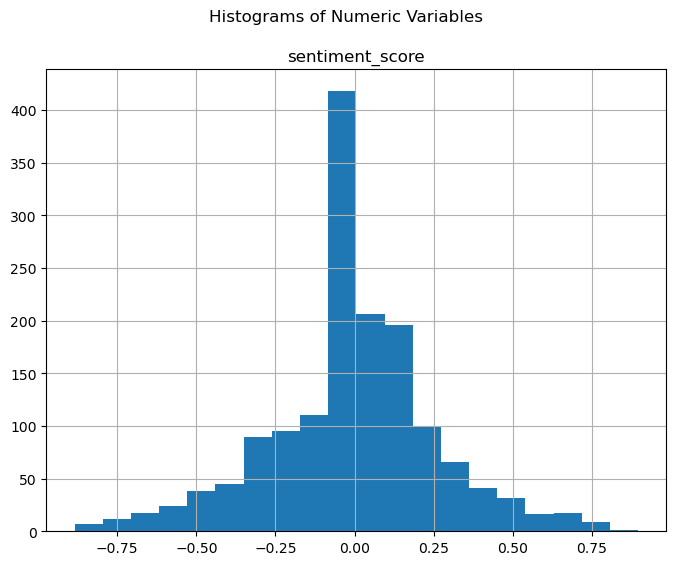

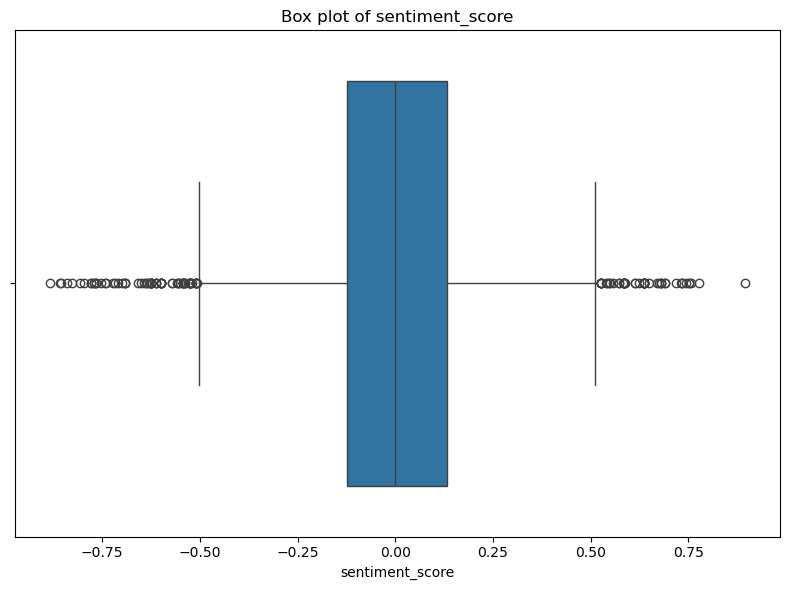

In [2492]:
# Function to visualize numeric variables
def visualize_numeric(df):
    numeric_cols = df.select_dtypes(include=['float64']).columns
    
    # Histogram for each numeric variable
    df[numeric_cols].hist(figsize=(8, 6), bins=20)
    plt.suptitle('Histograms of Numeric Variables')
    plt.show()

    # Box plots for each numeric variable
    plt.figure(figsize=(8, 6))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

visualize_numeric(df_sentiment)

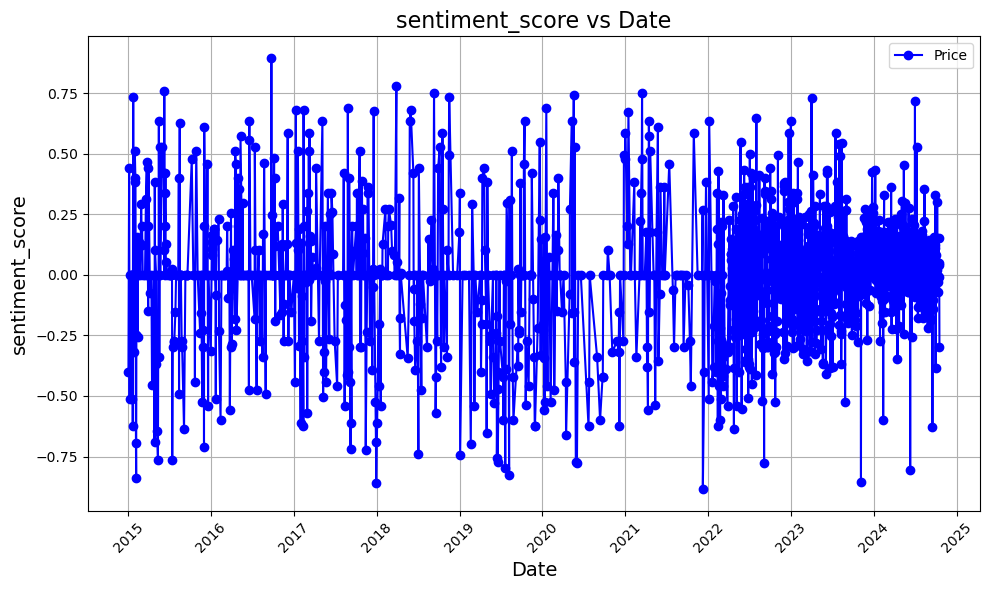

In [2262]:
# sorting the data with the date range
df_sentiment = df_sentiment.sort_values(by='date')

# Plotting the data
plt.figure(figsize=(10, 6))  # Optional: Set figure size
plt.plot(df_sentiment['date'], df_sentiment['sentiment_score'], color='blue', marker='o', linestyle='-', label='Price')

# Adding labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('sentiment_score', fontsize=14)
plt.title('sentiment_score vs Date', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  
plt.show()


Observation:  There are more sentiment records between 2015 and 2024

In [2594]:
# group sentiment score into four categories
# Define the bins and labels for grouping sentiment scores
bins = [-1, -0.5, 0.5, 1]  # Define boundaries for each group
labels = ['Negative','Neutral' ,'Positive']  # Define group names

In [2596]:
# create a new column to assign the group according to the sentimnet score
# Group the sentiment scores into the three categories
df_sentiment['sentiment_group'] = pd.cut(df_sentiment['sentiment_score'], bins=bins, labels=labels, include_lowest=True)

In [2600]:
# Print the DataFrame with sentiment groups
df_sentiment.head()


,date,sentiment_score,sentiment_group
1,2015-01-02,-0.4019,Neutral
4,2015-01-05,0.4404,Neutral
6,2015-01-07,-0.5106,Negative
8,2015-01-09,0.0000,Neutral
11,2015-01-12,0.0000,Neutral


In [2602]:
df_sentiment['sentiment_group'].value_counts()

sentiment_group
Neutral     1407
Negative      74
Positive      58
Name: count, dtype: int64

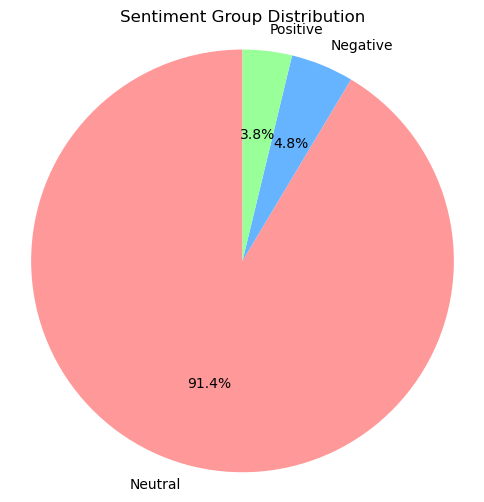

In [2604]:
# Plot pie chart distribution of the sentiment score category
sentiment_counts = df_sentiment['sentiment_group'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sentiment Group Distribution')
plt.axis('equal')  

# Show the plot
plt.show()

Observation:
* There are more negative sentiment in the dataset

In [2270]:
# drop the sentiment group colunm.
df_sentiment.drop(columns='sentiment_group', inplace=True)

In [2271]:
df_sentiment.head()

,date,sentiment_score
1,2015-01-02,-0.4019
4,2015-01-05,0.4404
6,2015-01-07,-0.5106
8,2015-01-09,0.0000
11,2015-01-12,0.0000


In [2272]:
#export the final sentinent dataset to csv for unward analysis
df_sentiment.to_csv('result_Data/sentiment_dataset.csv', index=False)